In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('./london_weather.csv')
df.dropna(inplace= True)
df.reset_index(drop=True, inplace=True)

#group every 30 elements to get mean monthly temp
df=df.groupby(np.arange(len(df.index))//30).mean()


# #df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')

# 
# df=df.groupby(np.arange(len(df.index))//30).mean()

# # #df['date'].dt.to_period('M')

# df.sort_values(by='date', inplace = True)
# df.reset_index(drop=True, inplace=True)
# df.columns = ['ds','y']
# df.set_index('ds', inplace= True)








# im=pd.data_range('1979-01','2020-12',freq='MS').strftime("%Y-%m").tolist()

# #df.drop('Month',axis=1,inplace=True)
# #df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')
# #df.columns = ['ds','y']
# #df=df.drop('ds', axis=1)

# #df.set_index('ds', inplace= True)

# # df['date'] = pd.to_datetime(df['date'],format='%Y%m%d')


# # df.sort_values(by='date', inplace = True)
# # df.reset_index(drop=True, inplace=True)

# # df.columns = ['ds','y']
# # df.set_index('ds', inplace= True)


df




,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure
0,1.979012e+07,5.800000,1.950000,29.600000,4.140000,0.683333,-2.513333,2.326667,101066.333333
1,1.979023e+07,6.166667,2.466667,55.433333,5.703333,2.863333,0.206667,1.393333,101257.666667
2,1.979033e+07,5.900000,2.943333,97.600000,8.756667,5.233333,1.653333,3.083333,100192.666667
3,1.979043e+07,6.033333,4.273333,149.500000,12.850000,8.790000,4.860000,2.923333,101269.000000
4,1.979053e+07,5.633333,5.980000,198.566667,17.730000,13.050000,8.650000,2.430000,101549.666667
...,...,...,...,...,...,...,...,...,...
504,2.020085e+07,5.333333,4.656667,174.133333,22.980000,18.686667,14.430000,1.960000,101359.333333
505,2.020095e+07,4.466667,5.740000,144.500000,19.800000,15.303333,10.850000,3.200000,101066.000000
506,2.020105e+07,5.466667,2.093333,64.133333,14.573333,11.356667,8.180000,2.653333,101411.333333
507,2.020115e+07,6.200000,1.230000,33.433333,10.226667,7.933333,5.696667,1.826667,101369.333333


In [12]:
type(df)
df[['precipitation','sunshine']]

,precipitation,sunshine
0,2.326667,1.950000
1,1.393333,2.466667
2,3.083333,2.943333
3,2.923333,4.273333
4,2.430000,5.980000
...,...,...
504,1.960000,4.656667
505,3.200000,5.740000
506,2.653333,2.093333
507,1.826667,1.230000


In [ ]:
# https://stackoverflow.com/questions/57080071/arima-model-producing-a-straight-line-prediction
# Visualize seasonal decomposition

In [4]:
#find d

from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.y.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#if p<0.05, stationary, no differencing required, 
# d=0


AttributeError: 'DataFrame' object has no attribute 'y'

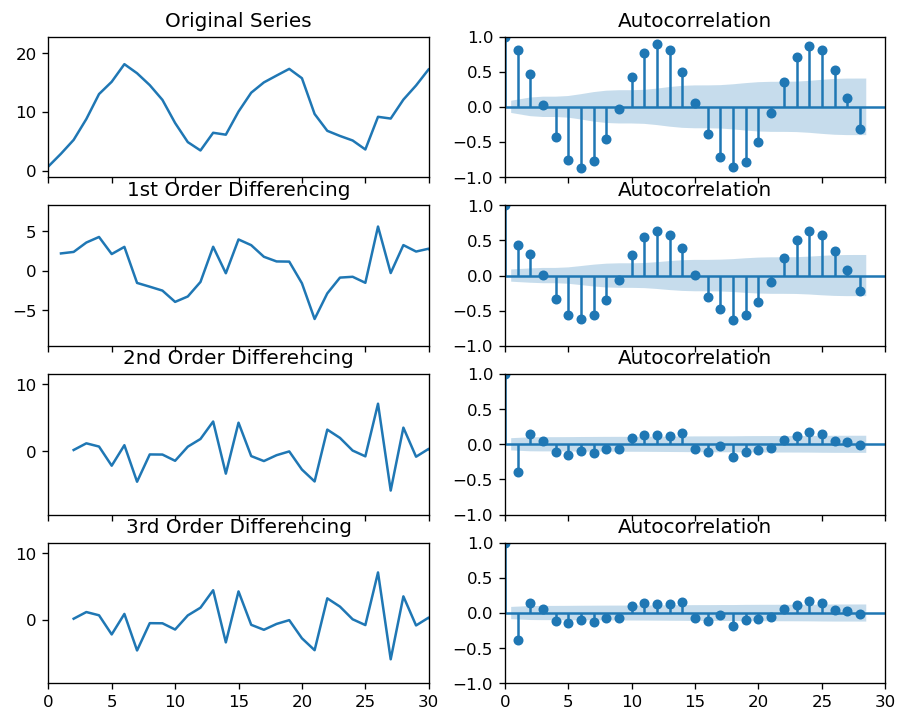

In [30]:
"""# find d if not stationery
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.y); axes[0, 0].set_title('Original Series')
plot_acf(df.y, ax=axes[0, 1])
plt.xlim(0, 30)

# 1st Differencing
axes[1, 0].plot(df.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()
"""

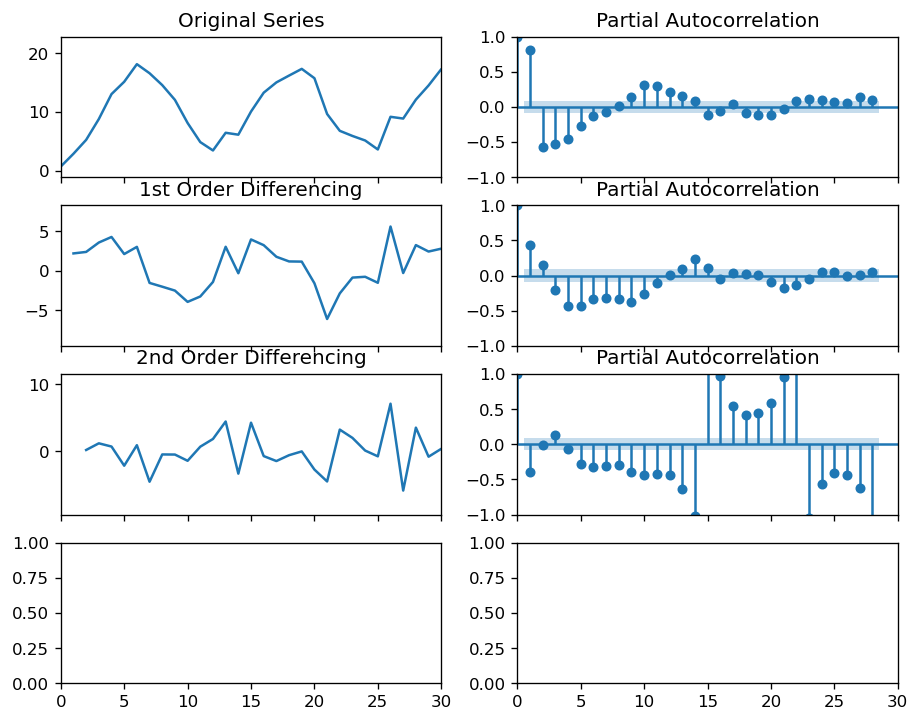

"from statsmodels.graphics.tsaplots import plot_pacf\n\n# PACF plot of 1st differenced series\nplt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})\n\nPACFplot=df.reset_index(drop = True)\n\nfig, axes = plt.subplots(1, 2, sharex=True)\naxes[0].plot(PACFplot.y.diff()); axes[0].set_title('1st Differencing')\naxes[1].set(ylim=(0,5))\n\nplot_pacf(PACFplot.y.diff().dropna(), lags=40, ax=axes[1])\nplt.xlim(0, 20)##################\nplt.ylim(-0.25, 0.250)##################\nplt.show()"

In [64]:
# find p
# PACF plot of Non-differenced series
"""plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.y); axes[0].set_title('No Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.y.dropna(), ax=axes[1])
plt.xlim(0, 40)##################
plt.show()"""


import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(4, 2, sharex=True)
axes[0, 0].plot(df.y); axes[0, 0].set_title('Original Series')
plot_pacf(df.y.dropna(), ax=axes[0, 1])# dropna () removes the rows that contains NULL values
plt.xlim(0, 30)

# 1st Differencing
axes[1, 0].plot(df.y.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_pacf(df.y.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.y.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_pacf(df.y.diff().diff().dropna(), ax=axes[2, 1])

plt.show()



"""from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

PACFplot=df.reset_index(drop = True)

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(PACFplot.y.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))

plot_pacf(PACFplot.y.diff().dropna(), lags=40, ax=axes[1])
plt.xlim(0, 20)##################
plt.ylim(-0.25, 0.250)##################
plt.show()"""


In [65]:
# # find q
# import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(df.y); axes[0].set_title('No Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(df.y.dropna(), ax=axes[1])
# plt.xlim(0, 40)
# plt.show()

# #simply assume q=2

# """import pandas as pd
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# import matplotlib.pyplot as plt
# plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

# PACFplot=df.reset_index(drop = True)

# fig, axes = plt.subplots(1, 2, sharex=True)
# axes[0].plot(PACFplot.y.diff()); axes[0].set_title('1st Differencing')
# axes[1].set(ylim=(0,1.2))
# plot_acf(PACFplot.y.diff().dropna(), ax=axes[1])
# plt.xlim(0, 40)
# plt.show()"""

# test 1 

In [23]:
# Split data into train / test sets
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:] # set one year(12 months) for testing

In [32]:
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(y=df['mean_temp'], X=df[['precipitation','sunshine', 'pressure']],
                          start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=1892.777, Time=4.17 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2046.454, Time=0.29 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1926.330, Time=3.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1897.246, Time=1.83 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2044.820, Time=1.04 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=2045.735, Time=3.25 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=1893.219, Time=5.28 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=1893.795, Time=8.82 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=1929.172, Time=2.66 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=1893.749, Time=10.85 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=1892.235, Time=1.71 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=2044.519, Time=0.91 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=1892.891, Time=2.66 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=1888.222, Time=7.11 sec
 ARIMA(1,0,0)(1,1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  509
Model:             SARIMAX(2, 0, 0)x(0, 1, [1, 2], 12)   Log Likelihood                -934.532
Date:                                 Tue, 21 Mar 2023   AIC                           1885.064
Time:                                         21:22:43   BIC                           1918.732
Sample:                                              0   HQIC                          1898.278
                                                 - 509                                         
Covariance Type:                                   opg                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
precipitation     0.0851      0.092      0.920      0.357      -0.096       0.266
sunshine          0.4983      0.068      7.380      0.000       0.366       0.631
pressure         -0.0001      0.000     -0.740      0.459      -0.000       0.000
ar.L1             0.2322      0.046      5.010      0.000       0.141       0.323
ar.L2             0.0936      0.045      2.066      0.039       0.005       0.182
ma.S.L12         -0.6651      0.047    -14.259      0.000      -0.757      -0.574
ma.S.L24          0.0807      0.046      1.736      0.083      -0.010       0.172
sigma2            2.4753      0.156     15.886      0.000       2.170       2.781
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.94   Prob(JB):                         0.89
Heteroskedasticity (H):               0.86   Skew:                             0.04
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
#build up ARIMA 

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm


#'precipitation','sunshine', (0, 3),(1, 2, 12) VARMA
model = sm.tsa.VARMAX(endog = train[['mean_temp', 'precipitation','sunshine', 'pressure']],
                order = (2, 0), 
                seasonal_order =(0, 1, 2, 12))

# #'precipitation','sunshine', 'pressure', (2, 0), (0, 1, 2, 12))
# model = sm.tsa.VARMAX(endog = train['mean_temp'],
#                       exog = train[['precipitation','sunshine', 'pressure']],
#                 order = (2, 0), 
#                 seasonal_order =(0, 1, 2, 12))

  
result = model.fit()
result.summary()

Dep. Variable:,"['mean_temp', 'precipitation', 'sunshine', 'pressure']",No. Observations:,497
Model:,VAR(2),Log Likelihood,-6059.732
,+ intercept,AIC,12211.465
Date:,"Wed, 22 Mar 2023",BIC,12405.060
Time:,17:47:17,HQIC,12287.450
Sample:,0,,
,- 497,,
Covariance Type:,opg,,
Ljung-Box (L1) (Q):,"15.98, 0.02, 1.56, 0.03",Jarque-Bera (JB):,"2.82, 59.16, 5.40, 4.36"
Prob(Q):,"0.00, 0.90, 0.21, 0.85",Prob(JB):,"0.24, 0.00, 0.07, 0.11"
Heteroskedasticity (H):,"0.90, 0.84, 1.10, 0.92",Skew:,"0.05, 0.79, 0.18, 0.06"


# testing 1

In [41]:
#Predictions of ARIMA Model against the test set
start = len(train)
end = len(train) + len(test) - 1 
  
# Predictions for one-year against the test set
predictions = result.predict(start, end, dynamic = True)
predictions.index=test.index

# plot predictions and actual values
#predictions.plot(legend = True)
#test['y'].plot(legend = True)





In [42]:
predictions

,mean_temp,precipitation,sunshine,pressure
497,7.413735,1.724600,3.216394,101589.905412
498,7.928953,1.627712,3.487235,101563.883724
499,9.413546,1.558099,4.172129,101548.638572
500,11.001059,1.527990,4.764180,101562.749314
501,12.328143,1.552057,5.078244,101560.189107
502,13.148208,1.593476,5.147541,101551.912581
503,13.366594,1.643165,5.001831,101542.532433
504,13.065542,1.688720,4.721367,101533.879781
505,12.433646,1.719207,4.405125,101528.000594
506,11.696392,1.730645,4.137134,101525.701054


<Axes: >

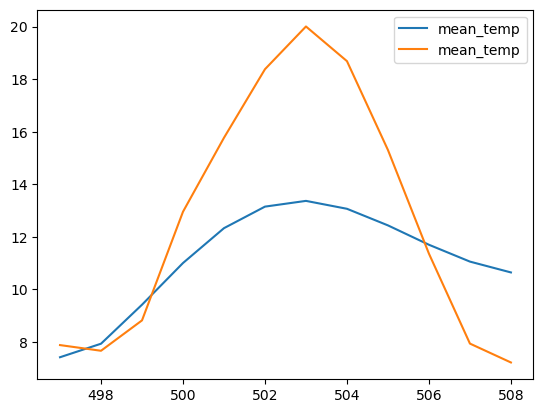

In [45]:
# plot predictions and actual values
predictions['mean_temp'].plot(legend = True)
test['mean_temp'].plot(legend = True)

# forecasting 

In [69]:
#Evaluate the model using MSE and RMSE
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  
# Calculate root mean squared error
RMSE=rmse(test["y"], predictions)
  
# Calculate mean squared error
ERROR=mean_squared_error(test["y"], predictions)

In [70]:
ERROR

1.111683296108358

<Axes: >

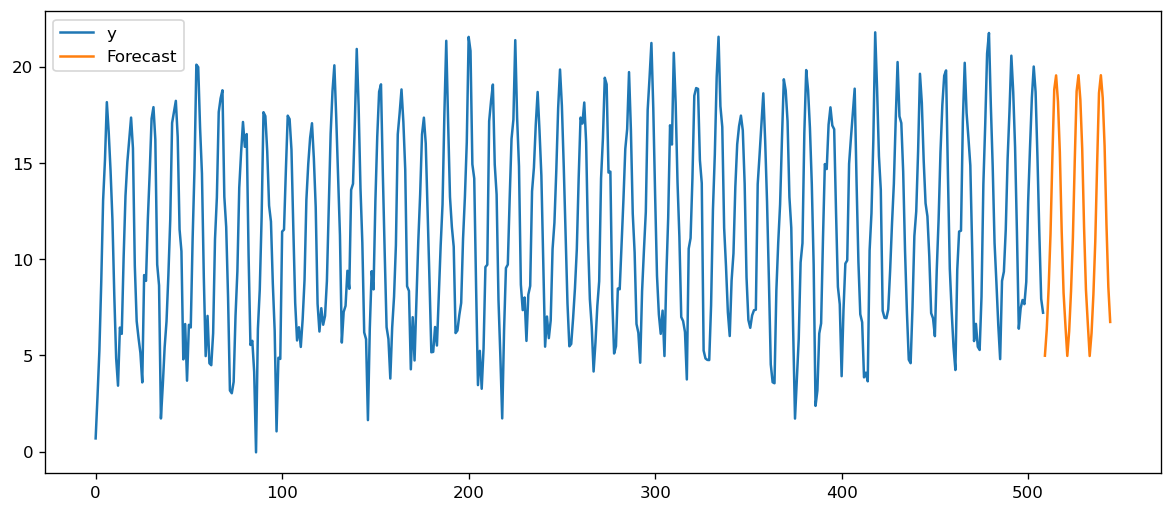

In [71]:
#Forecast using ARIMA Model
#forecasting 3 year


# Train the model on the full dataset
model = ARIMA(train['y'], 
                order = (2, 0, 2), 
                seasonal_order =(0, 1, 1, 12))
result = model.fit()
  
# Forecast for the next 1 years
forecast = result.predict(start = len(df), 
                          end = (len(df)-1) + 36, 
                          typ = 'levels').rename('Forecast')

# Plot the forecast values
df['y'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)